# ABEL plasma-density ramp example

By Carl A. Lindstrøm (University of Oslo), 20 Oct 2023

### Import ABEL framework

In [1]:
from abel import *
import numpy as np
%load_ext autoreload
%autoreload 2

### Define the beams and plasma stage

In [2]:
# define driver
driver = SourceTrapezoid()
driver.charge = -8e-9 # [C]
driver.energy = 6e9 # [eV]
driver.rel_energy_spread = 0.01
driver.bunch_length = 1050e-6 # [m]
driver.gaussian_blur = 50e-6 # [m]
driver.current_head = 0.1e3
driver.z_offset = 1580e-6 # [m]
driver.emit_nx, driver.emit_ny = 100e-6, 100e-6 # [m rad]
driver.beta_x, driver.beta_y = 0.5, 0.5 # [m]
driver.num_particles = 200000
driver.jitter.x = 0e-9 # [m]
driver.jitter.y = 0e-9 # [m]
driver.symmetrize = True

# define stage
stage = StageQuasistatic2d()
#stage = StageHipace()
stage.driver_source = driver
stage.ion_motion = False
stage.nom_energy_gain = 10.6e9 # [eV]
stage.nom_accel_gradient = 1e9 # [GV/m]
stage.plasma_density = 6e20 # [m^-3]
stage.ramp_beta_mag = 10
stage.calculate_evolution = True
#stage.upramp = stage.__class__()
#stage.downramp = stage.__class__()

# define beam
source = SourceBasic()
source.charge = -1e10 * SI.e # [C]
source.energy = 58e9 # [eV]
source.rel_energy_spread = 0.01
source.bunch_length = 42e-6 # [m]
source.emit_nx, source.emit_ny = 75e-6, 0.25e-6 # [m rad]
source.beta_x = stage.matched_beta_function(source.energy)
source.beta_y = source.beta_x
source.num_particles = 10000
stage.nom_energy = source.energy

# define linac
linac = PlasmaLinac()
linac.source = source
linac.stage = stage

### Run simulations

In [3]:
linac.stage.num_nodes = 8
linac.run('ramp_example', num_shots=1, overwrite=True, parallel=False);

Tracked #0  SourceBasic             (s =    0.0 m) :   E =  58.0 GeV, Q = -1.60 nC, σz =  42.3 µm, σE =  1.0%, ε =  74.2/0.3 mm-mrad
    ... #1  StageQuasistatic2d #1   (s =   10.6 m) :   E =  67.9 GeV, Q = -1.60 nC, σz =  42.3 µm, σE =  1.0%, ε =  74.1/0.3 mm-mrad


### Plot the evolution and the wakefield

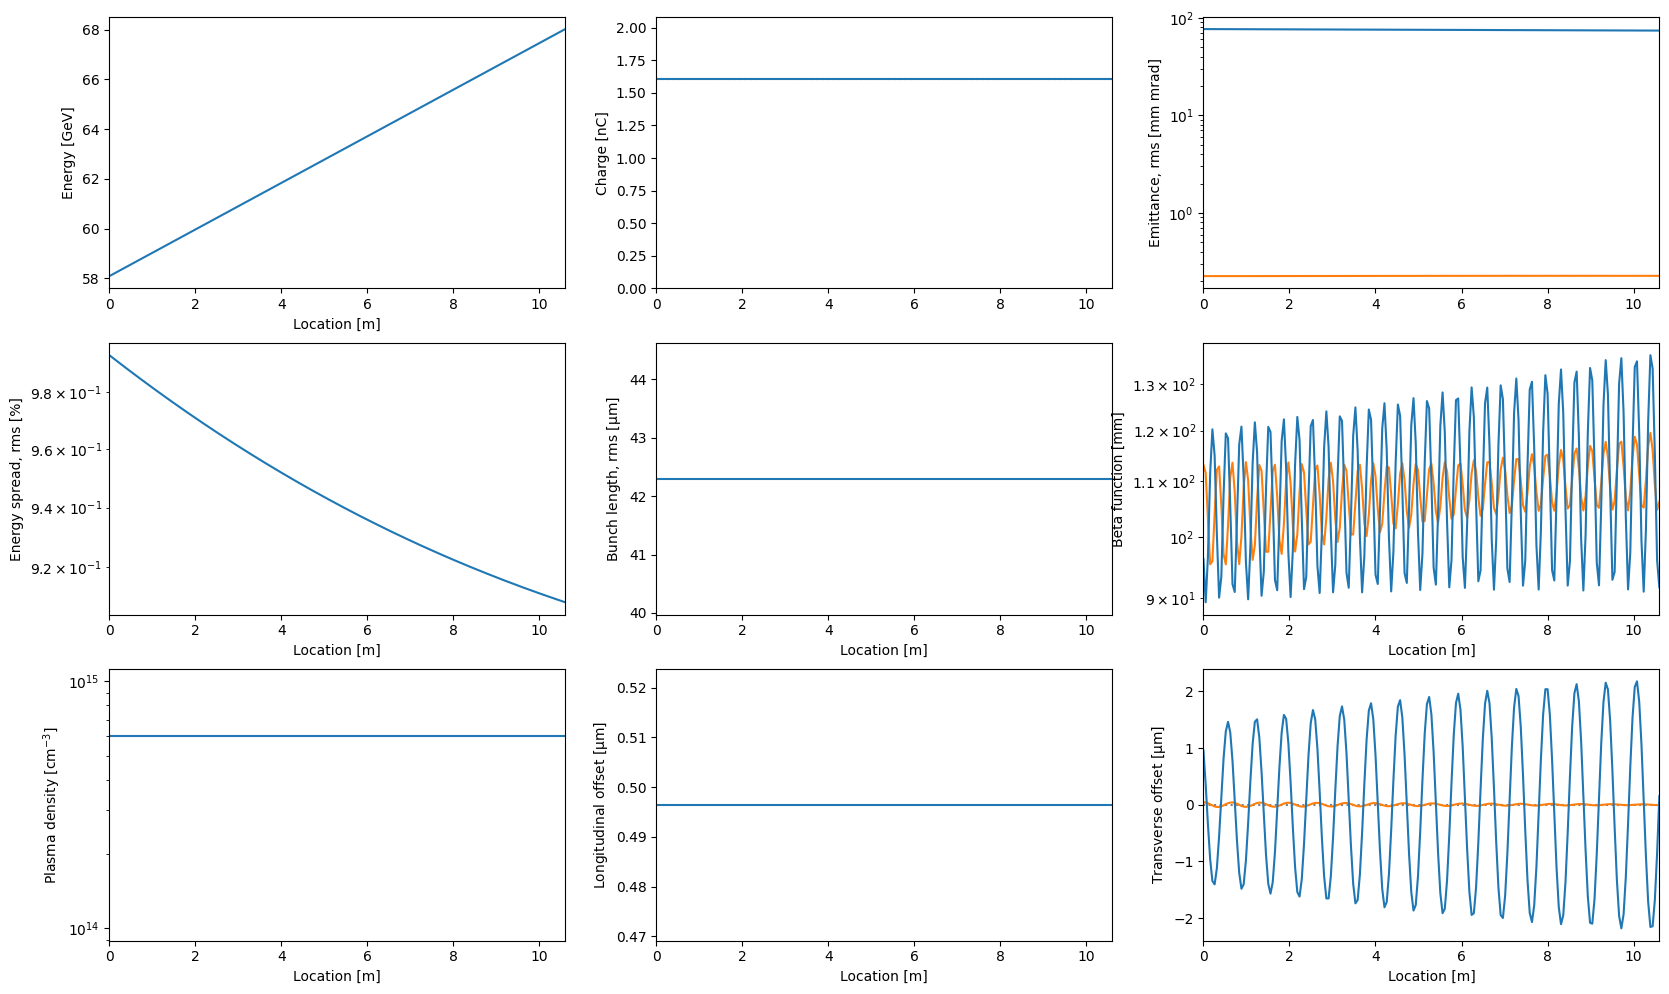

In [4]:
linac.stage.plot_evolution()

AttributeError: 'NoneType' object has no attribute 'plot_wake'

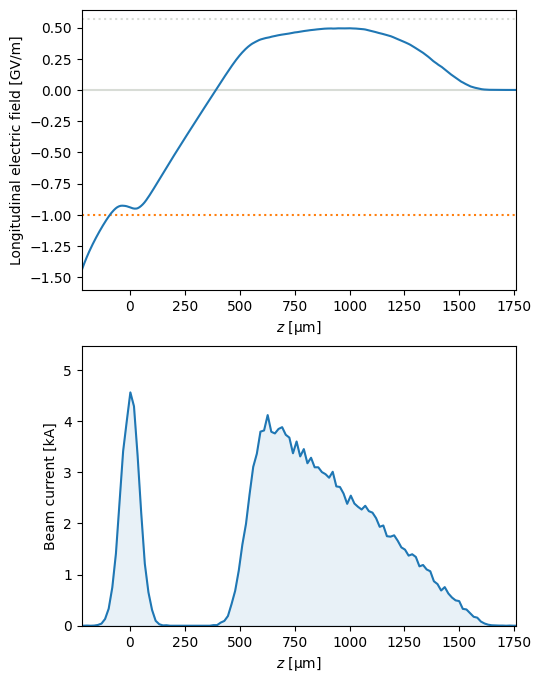

In [5]:
linac.stage.plot_wakefield()
linac.stage.upramp.plot_wake()
linac.stage.plot_wake()
linac.stage.downramp.plot_wake()